<a href="https://colab.research.google.com/github/tanvir-talha058/Machine-Learning/blob/main/mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Set your paths (update these paths as per your Google Drive structure)
base_path = '/content/drive/MyDrive/dataset1'
train_dir = '/content/drive/MyDrive/dataset1/train'
val_dir = '/content/drive/MyDrive/dataset1/validation'
model_save_path = f"{base_path}/plant_disease_mobilenetv2.h5"

# Step 2: Dataset preprocessing
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical"
)

# Step 3: Load MobileNetV2
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False

# Step 4: Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(train_generator.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Step 5: Compile and train the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size
)

# Step 6: Fine-tune the model
base_model.trainable = True
fine_tune_at = len(base_model.layers) // 2

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

fine_tune_epochs = 10
total_epochs = epochs + fine_tune_epochs

history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size
)

# Step 7: Save the model
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 3389 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 1865s 17s/step - accuracy: 0.8393 - loss: 0.4750 - val_accuracy: 0.9600 - val_loss: 0.1014
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0173 
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


105/105 ━━━━━━━━━━━━━━━━━━━━ 821s 7s/step - accuracy: 0.9736 - loss: 0.0837 - val_accuracy: 0.9775 - val_loss: 0.0692
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 1.0000 - loss: 0.0094
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 813s 7s/step - accuracy: 0.9846 - loss: 0.0534 - val_accuracy: 0.9800 - val_loss: 0.0533
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 1.0000 - loss: 0.0022
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 794s 7s/step - accuracy: 0.9910 - loss: 0.0337 - val_accuracy: 0.9837 - val_loss: 0.0460
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.9688 - loss: 0.0471
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 826s 7s/step - accuracy: 0.9820 - loss: 0.0473 - val_accuracy: 0.9787 - val_loss: 0.0615
Epoch 10/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.9688 - loss: 0.0571
Epoch 10/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 958s 9s/step - accuracy: 0.9396 - loss: 0.1951 - val_accuracy: 0.9700 - val_loss: 0.0789
Epoch 11/20


Model saved at: /content/drive/MyDrive/dataset1/plant_disease_mobilenetv2.h5


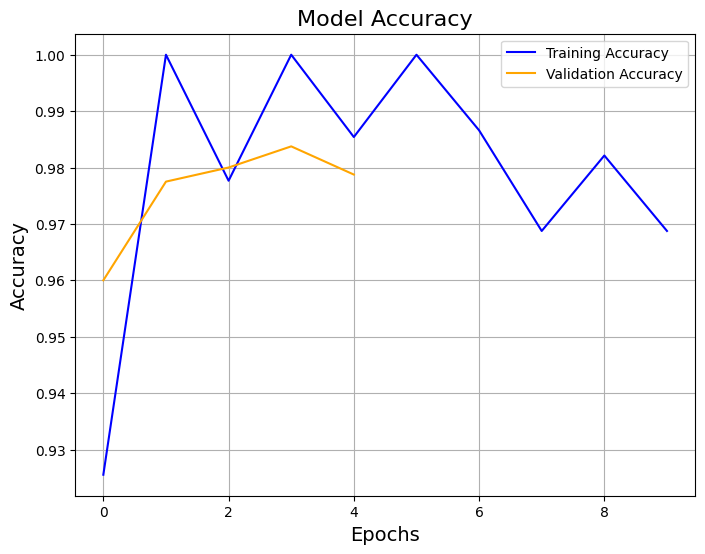

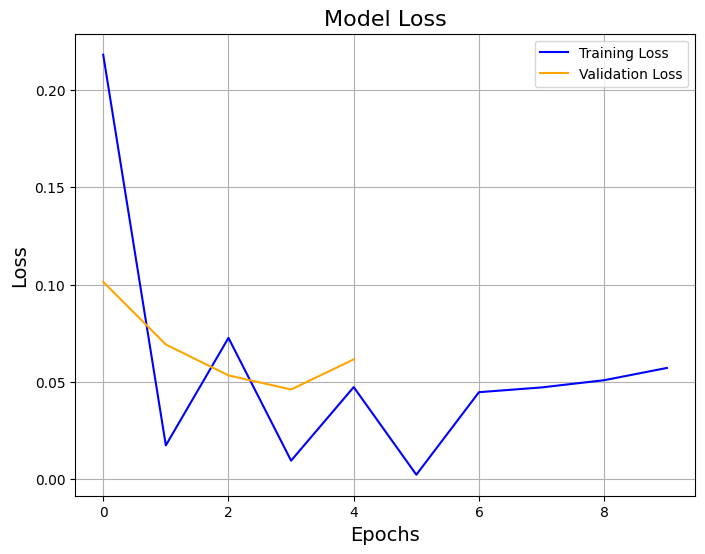

25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step


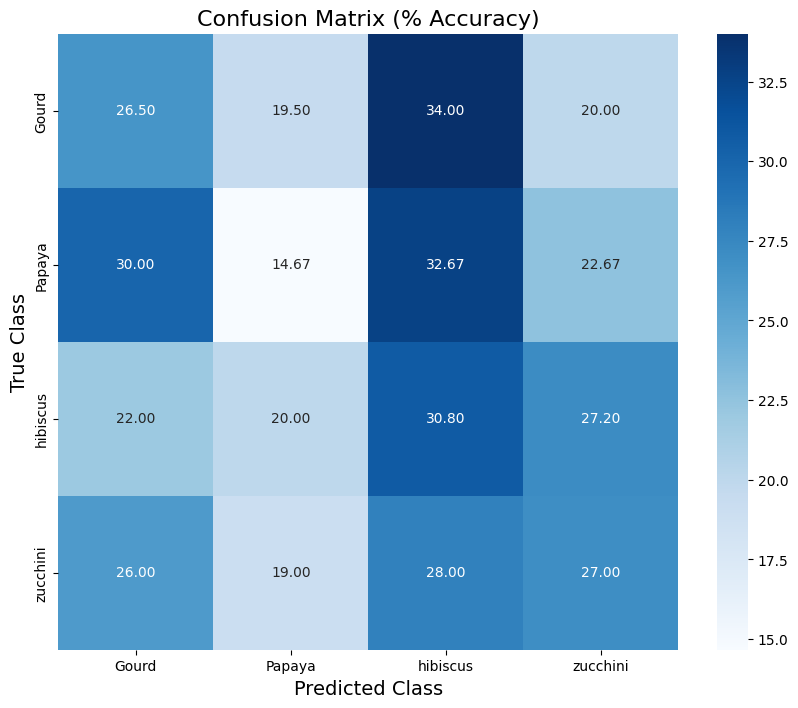

25/25 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step
Classification Report:

              precision    recall  f1-score   support

       Gourd       0.23      0.24      0.24       200
      Papaya       0.20      0.20      0.20       150
    hibiscus       0.32      0.32      0.32       250
    zucchini       0.29      0.28      0.28       200

    accuracy                           0.27       800
   macro avg       0.26      0.26      0.26       800
weighted avg       0.27      0.27      0.27       800



In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Plot Training and Validation Accuracy
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title('Model Accuracy', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Training and Validation Loss
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Model Loss', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Confusion Matrix Visualization
def plot_confusion_matrix(generator, model):
    # Get true labels and predictions
    true_labels = generator.classes
    class_names = list(generator.class_indices.keys())
    generator.reset()
    predictions = model.predict(generator, verbose=1)
    predicted_labels = np.argmax(predictions, axis=1)

    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix (% Accuracy)', fontsize=16)
    plt.xlabel('Predicted Class', fontsize=14)
    plt.ylabel('True Class', fontsize=14)
    plt.show()

# Classification Report
def print_classification_report(generator, model):
    true_labels = generator.classes
    class_names = list(generator.class_indices.keys())
    generator.reset()
    predictions = model.predict(generator, verbose=1)
    predicted_labels = np.argmax(predictions, axis=1)

    # Generate classification report
    report = classification_report(true_labels, predicted_labels, target_names=class_names)
    print("Classification Report:\n")
    print(report)

# Call the functions for visualization
plot_accuracy(history)
plot_loss(history)
plot_confusion_matrix(val_generator, model)
print_classification_report(val_generator, model)
